In [6]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import Dropout, Flatten, Dense

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from tensorflow.keras import datasets

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.batch(32)

In [9]:
from tensorflow.keras import layers

input_shape = (28, 28, 1)
num_classes = 10

inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = Conv2D(32, 3, padding="SAME")(inputs)
net = Activation("relu")(net)
net = Conv2D(32, 3, padding="SAME")(net)
net = Activation("relu")(net)
net = MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

net = Conv2D(64, 3, padding="SAME")(net)
net = Activation("relu")(net)
net = Conv2D(64, 3, padding="SAME")(net)
net = Activation("relu")(net)
net = MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = Flatten()(net)
net = Dense(512)(net)
net = Activation("relu")(net)
net = Dropout(0.25)(net)

# Output Layer
net = Dense(num_classes)(net)
net = Activation("softmax")(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name="Basic_CNN")

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["acc"])

hist = model.fit(train_ds, epochs=1)  # 훈련 기록을 hist에 저장하기

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1262 - acc: 0.9596


## test_ds에 대한 loss 및 acc 확인하기

In [11]:
print(hist.history)  # hist에는 1 에폭당 loss와 acc(metrics로 지정했음)가 들어있다.

{'loss': [0.12618282437324524], 'acc': [0.9595666527748108]}


## 테스트 데이터에 대한 검증

In [14]:
model.evaluate(test_ds)  # test세트에 대한 loss와 acc 확인

313/313 [==============================] - 1s 3ms/step - loss: 0.0375 - acc: 0.9873


[0.03752899914979935, 0.9872999787330627]

In [15]:
# 아까는 훈련 당 과정을 본거면
# 지금은 훈련이 다 된 상태의 결과를 보는 것

## Prediction

In [17]:
test_image = X_test[0, :, :, 0]
test_image.shape

(28, 28)

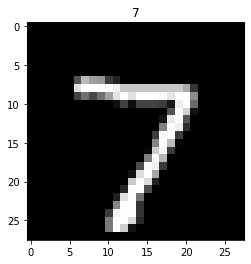

In [18]:
plt.title(y_test[0])
plt.imshow(test_image, 'gray')
plt.show()

In [20]:
pred = model.predict(test_image.reshape(1, 28, 28, 1))
pred.shape

(1, 10)

In [21]:
pred

array([[4.0600217e-08, 2.3255273e-08, 9.1569814e-07, 8.5376350e-08,
        7.9483030e-08, 1.8385807e-08, 3.1232048e-11, 9.9999499e-01,
        1.3121512e-08, 3.7878267e-06]], dtype=float32)

In [24]:
import numpy as np

np.argmax(pred)

7

In [25]:
# 데이터셋에서 1배치만 뽑아내기 - take 안쓰고 뽑아내기

test_batch, label = next(iter(test_ds))
test_batch.shape

TensorShape([32, 28, 28, 1])

In [26]:
predictions = model.predict(test_batch)
predictions.shape

(32, 10)

In [27]:
np.argmax(predictions, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

In [30]:
# 항상 마지막 차원 수 생각해야 함
np.argmax(predictions, -1)  # 이렇게 하면 마지막 차원

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

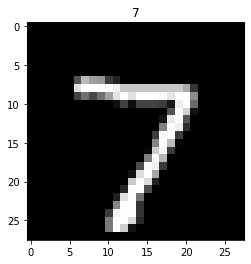

In [36]:
pred_max = np.argmax(predictions, -1)
plt.title(pred_max[0])
plt.imshow(test_batch[0, ..., 0], "gray")
plt.show()

In [37]:
# 예측한 것 보여준거임

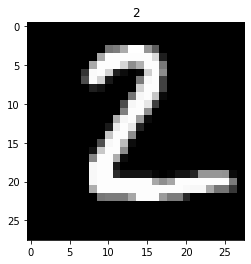

In [39]:
pred_max = np.argmax(predictions, -1)
plt.title(pred_max[1])
plt.imshow(test_batch[1, ..., 0], "gray")
plt.show()

In [40]:
# 예측과 이미지 얼추 맞음

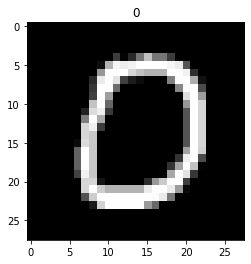

In [41]:
pred_max = np.argmax(predictions, -1)
plt.title(pred_max[10])
plt.imshow(test_batch[10, ..., 0], "gray")
plt.show()